# ECMM426 Computer Vision
## 2022/2023 Course Assessment

#### Version: V1

This course assessment represents 60% of the overall module assessment.

This is an individual exercise and your attention is drawn to the College and University guidelines on collaboration and plagiarism, which are available from the College website.


**Note:**
1. Do not change the name of this notebook and accompanying files, i.e. the files have to be named: cvca.ipynb, main.py.
2. Do not remove/delete any cell.
3. Do not add any cell (you can work on a draft notebook and copy the implementations here).
4. Do not add your name or student code in the notebook or in the file name.
5. Do not use any external packages without written approval except those listed here:
   -    from matplotlib import pyplot as plt
   -    from skimage.draw import line_aa, line
   -    from skimage.draw import circle_perimeter_aa, circle_perimeter
   -    import numpy as np
6. Do not use helper functions.
7. A different set of test images will be used during marking.  
8. Your program/function will be forced to terminate if it does not stop while grading.
9. The CA requires electronic submission to the BART online submission platform. You should submit your file (cvca.ipynb) via the electronic submission system at https://bart.exeter.ac.uk/ under the category, ECMM426 Computer Vision, Coursework: workshop code.  
10. The submission due is 8 March 2023 at 12:00. 
11. Upload a compressed version of your files as a single file using the zip compression format.
12. You should upload your file ahead in advance of the deadline to avoid a late cap due to Internet problems or other technical difficulties.
13. Sending the file via e-mail is NOT considered a submission.
14. It is your responsibility to make sure you submitted the correct file. No extension will be granted on the grounds of mistakes in the upload process (e.g., the wrong version, a PDF, a link to the file etc.).
15. The understanding of the problem specifications and requirements described in this CA is part of the assessment process.

> Your codes and comments should be entered in the regions specified between
> *[Your code goes here]* and *[Your code ends here]*.
> Outside the regions, you cannot enter code or modify code: otherwise, no mark will be given.

**Evaluation criteria:**

Each question asks for one or more techniques to be implemented. 

Each question is awarded a number of marks. 

Each question defines the marking criteria in the docstring of the given function.

It is recommended to refer to Lectures, Workshops and content from the Reading List first before using other resources.

### Import packages

In [1]:
# Other modules are not supported during coursework marking.
# Other modules cannot be used unless a written approval is given.
from matplotlib import pyplot as plt
import numpy as np
# More information about skimage draw module can be found at 
# https://scikit-image.org/docs/stable/api/skimage.draw.html#skimage.draw.line
from skimage.draw import line, line_aa
from skimage.draw import circle_perimeter, circle_perimeter_aa


---
### Q1: Image negative (2 marks)
---

In [2]:
def my_image_negative(input_image):
    """Description:
    This function converts the input image into image negative.
    The implementation is that output intensity = 255 - input intensity, where 255 is the maximum intensity of an 8-bit single channel image.
    Then, output intensity is stored at the same pixel position.

    Parameter: input_image = input image array.

    Return: new_image = image negative.

    Requirements:
    Pre-defined/built-in functions for image negative cannot be used.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the implementation does not follow the description above.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    # My code
    for i in range(H):
        for j in range(W):
            new_image[i,j] = 255 - input_image[i,j] # Flip each pixel

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q2: Image smoothing (4 marks)
---

In [3]:
def my_image_smoothing(input_image):
    """Description:
    This function smooths the input image by using a 3x3 mean filter.
    The implementation of the 3x3 mean filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not an average filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################
 
    # creating cross-correlation kernel
    kernel = np.ones((3,3))*1/9

    # Access every individual pixel -> perform mean filter
    for i in range(1,H-1):
        for j in range(1,W-1):
            A = input_image[i-1:i+2 ,j-1:j+2].reshape(-1)
            new_image[i, j] = np.sum(A*kernel.reshape(-1))

    # # Renormalize to 0-255
    new_image = (new_image - np.min(new_image))/(np.max(new_image) - np.min(new_image))*255

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q3: Edge gradient magnitude estimation (4 marks)
---

In [4]:
def my_grad_mag(input_image):
    """Description:
    This function estimates the edge gradient magnitude from the input image by using
    the 3x3 Sobel operators along x and y directions.
    The implementation of the 3x3 Sobel operators follows the details given in the Image Derivatives and Edge Detection lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation, edge detection cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filters are not Sobel filters.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################
   
    # creating Sobel filters
    sx = np.array(([-1,0,1],[-2,0,2],[-1,0,1])).reshape(-1)
    sy = np.array(([1,2,1],[0,0,0],[-1,-2,-1])).reshape(-1)

    # Access every individual pixel -> perform Sobel filter along X , Y directions
    for i in range(1,H-1):
        for j in range(1,W-1):
            A = input_image[i-1:i+2 ,j-1:j+2].reshape(-1)
            dfdx = np.sum(A*sx)
            dfdy = np.sum(A*sy)
            new_image[i, j] = np.sqrt(dfdx**2 + dfdy**2)

    # # Renormalize to 0-255
    new_image = (new_image - np.min(new_image))/(np.max(new_image) - np.min(new_image))*255

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q4: Image sharpening (4 marks)
---

In [5]:
def my_image_sharpening(input_image):
    """Description:
    This function enhances the input image by using a 3x3 image sharpening filter.
    The implementation of the 3x3 image sharpening filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not an image sharpening filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    # creating composite sharpening filter
    k1 = np.ones((3,3))*1/9
    k2 = np.zeros((3,3))
    k2[1,1] = 2
    composite_k = k2 - k1
    
    # Access every individual pixel -> perform Sobel filter along X , Y directions
    for i in range(1,H-1):
        for j in range(1,W-1):
            A = input_image[i-1:i+2 ,j-1:j+2]
            new_image[i, j] = np.sum(A*composite_k)

    # Cap to [0,255]
    new_image = np.where(new_image > 255 , 255 , new_image)
    new_image = np.where(new_image < 0 , 0 , new_image)

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q5: Median filtering (4 marks)
---

In [6]:
def my_median_filtering(input_image):
    """Description:
    This function enhances the input image by using a 3x3 median filter.
    The implementation of the 3x3 median filter follows the details given in the Image Filtering lecture notes.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.
    The input image is corrupted by random noise.

    Return: new_image = filtered image.

    Requirements:
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the filter is not a median filter.
    No mark if the implementation does not follow details given the lecture notes.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    # creating cross-correlation kernel
    kernel = np.ones((3,3))

    # Access every individual pixel -> perform mean filter
    for i in range(1,H-1):
        for j in range(1,W-1):
            A = input_image[i-1:i+2 ,j-1:j+2]
            new_image[i, j] = np.median(A*kernel)

    # # Renormalize to 0-255
    new_image = (new_image - np.min(new_image))/(np.max(new_image) - np.min(new_image))*255

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q6: Histogram equalization (8 marks)
---

In [7]:
def my_histogram_equalization(input_image):
    """Description:
    This function performs histogram equalization on the input image.
    The implementation of the histogram equalization follows the details given in the Image Enhancement lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input image array.

    Return: new_image = histogram equalized image.

    Requirements:
    Pre-defined functions for estimating histogram, and histogram equalization cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the operation is not histogram equalization.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    No partial marking.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    N = input_image.shape[0]*input_image.shape[1] # total number of pixels in the image
    L = 255 #max(input_image.reshape(-1)+1) # levels of gray
    K = np.arange(L)

    # Histogram EQ
    n_k = np.array([np.sum(input_image == k) for k in K]) # bucketing the  pixels according to the gray levels
    # assert np.sum(n_k) == N, f'sum of bucketed pixels and total pixels should match. n_k = {sum(n_k)} and N = {N}'
    p_k = n_k / N #probability of kth gray level
    p_k_cum = np.cumsum(p_k) # calculating rolling sum
    p_k_cum_scaled = p_k_cum*max(K) # scaling by the largest gray level in the image
    p_k_scaled_int = np.array(list(map(lambda x: int(x) , p_k_cum_scaled))) # discretize it to integers
    
    # Fill up the new image with corresponding mapped intensity values after Histogram EQ
    for i in range(new_image.shape[0]):
        for j in range(new_image.shape[1]):
            new_image[i,j] = p_k_scaled_int[input_image[i,j]]

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q7: Line and paper detection (38 marks)
---

In [8]:
def my_line_detection(input_image):
    """Description:
    This function extracts two long sides of the major object, e.g., principal runway, by using the Hough transform.
    It is assumed that in the image there is only one major object (principal runway) with clear boundary.
    The object's long side is oriented along north direction approximately.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.
    
    Parameter: input_image = input array representing an image.
    This image has a major object with the long sides approximately parallel to the north direction.
    The input image is corrupted by random noise.

    Return: new_image = an original image with two white straight line segments (intensity = 255) outlining 
    the both long sides of the major object.
    For each white straight line segment, it must be lying on the long side of the major object.
    
    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if the operation is not Hough transform.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Partial marking is possible.
    """    
    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))
    ############################
    # [Your code starts here]
    ############################
    def smooth(input_image , kernel_size=5):
        '''
        smoothens the image
        '''
        # kernel info
        kernel = np.ones((kernel_size,kernel_size))/(kernel_size**2)
        # padding info
        pad = kernel_size//2
        # create padded img
        padded_image = np.pad(input_image , ((pad , pad),(pad , pad)) , mode = 'constant')
        # create new blank image
        H , W = padded_image.shape
        new_image = np.zeros((H,W))
        # blur image
        for i in range(pad , H - pad):
            for j in range(pad , W - pad):
                A = padded_image[i-pad:i+pad+1 , j-pad:j+pad+1]
                new_image[i,j] = np.sum(A*kernel)
        return new_image[pad:-pad , pad:-pad]
    
    def grad_mag(input_image, pad = 1):
        '''
        returns gradient magnitude of image
        '''
        # sobel filters
        sobelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        sobely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

        # create padded img
        padded_image = np.pad(input_image , ((pad , pad),(pad , pad)) , mode = 'constant')
        # create new blank image
        H , W = padded_image.shape
        thresh_image_grad , image_grad , image_angle = np.zeros((H,W)) , np.zeros((H,W)) , np.zeros((H,W))
        # blur image
        for i in range(pad , H - pad):
            for j in range(pad , W - pad):
                A = padded_image[i-pad:i+pad+1 , j-pad:j+pad+1]
                gx = np.sum(A*sobelx)
                gy = np.sum(A*sobely)
                image_grad[i,j] = np.sqrt(gx**2 + gy**2)
                # image_angle[i,j] = np.arctan2(gy , gx)
        # Normalize
        image_grad = (image_grad - np.min(image_grad))/(np.max(image_grad) - np.min(image_grad))*255
        # image_angle = (image_angle - np.min(image_angle))/(np.max(image_angle) - np.min(image_angle))*255
        
        # Thresholding
        thresh = np.percentile(image_grad , 95)
        for i in range(H):
            for j in range(W):
                if image_grad[i,j] >= thresh:
                    thresh_image_grad[i,j] = image_grad[i,j]
                else:
                    thresh_image_grad[i,j] = 0
        # Remove white border
        thresh_image_grad[1] = 0
        thresh_image_grad[:,1] = 0
        thresh_image_grad[-2] = 0
        thresh_image_grad[:,-2] = 0
        return thresh_image_grad[pad:-pad , pad:-pad] #, image_angle[pad:-pad , pad:-pad]
    
    def my_hough_transform(edge_img, threshold = 150 , percentile = 98.5):
        '''
        param edge_img : image with edges obtained after applying edge detection
        param threshold : lines with at least this number of points on them (deprecated - now only two most populated lines are selected)
        param percentile : the top 100 - percentile brightest pixels will be selected
        '''
        #diagonal length of image
        D = np.sqrt(edge_img.shape[0]**2+edge_img.shape[1]**2)
        #theta range -> 0 degree, 180 degree since origin is at the bottom left of the image
        #rho range -> 0, -diagonal length to +diagonal length
        theta_range = 180
        rho_range = int(D)
        #build accumulator
        accumulator = np.zeros((2*rho_range , theta_range))
        # Threshold to get edges pixel location (x,y) - brightest percentile of pixels
        edge_pixels = np.where(edge_img > np.percentile(edge_img.reshape(-1) , percentile))
        coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
        # Calculate rho value for each edge location (x,y) with all the theta range
        for p in coordinates:
            for t in range(theta_range):
                rho = int(round(p[1] * np.cos(np.deg2rad(t)) + p[0] * np.sin(np.deg2rad(t)))) # beware the flipping convention
                accumulator[rho + rho_range, t] += 1
        # return accumulator
        # rho , theta = np.where(accumulator>threshold)
        threshold = np.sort(accumulator.flatten())[::-1][1]
        rho , theta = np.where(accumulator >= threshold)
        return rho - rho_range , theta
    
    def draw_lines(img , edges , rho_pruned , theta_pruned  , intensity_thresh = 50):
        '''
        param img -> input_image
        param edges -> gradient intensity map
        param rho_pruned -> rho values for those lines with greater than a threshold number of points on them
        param theta_pruned -> theta values for those lines with greater than a threshold number of points on them
        param seg_thresh -> segmentation threshold for curtailing lines
        '''
        img_copy = img.copy()
        # Below few lines have been adapted from https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
        for (rho_i , theta_i) in list(zip(rho_pruned , theta_pruned)):
            a = np.cos(np.deg2rad(theta_i))
            b = np.sin(np.deg2rad(theta_i))
            x0 = int(np.round(a*rho_i))
            y0 = int(np.round(b*rho_i))
            x1 = int(np.round(x0 + 1000*(-b)))
            y1 = int(np.round(y0 + 1000*(a)))
            x2 = int(np.round(x0 - 1000*(-b)))
            y2 = int(np.round(y0 - 1000*(a)))
            # Create line
            rr , cc = line(y1,x1,y2,x2)
            # Clipping to edges of the image
            rr = np.clip(rr , 0 , img.shape[0]-1)
            cc = np.clip(cc , 0 , img.shape[1]-1)
            # Curtail one end
            c = 0
            for (i,j) in list(zip(rr,cc)):
                c+=1
                if edges[i,j] > intensity_thresh:
                    break
            # Curtail another end
            d = 0
            for (i,j) in list(zip(rr,cc))[::-1]:
                d+=1
                if edges[i,j] > intensity_thresh:
                    break
            # Clipping to edges of the runway
            rr_mod = rr[c:len(rr)-d]
            cc_mod = cc[c:len(rr)-d]
            # cc = np.clip(cc , j , img.shape[1]-1)

            img_copy[rr_mod, cc_mod] = 255 # set to white
            
        return img_copy
    
    # Main code
    thresh_image_grad = grad_mag(smooth(input_image , kernel_size=3) , pad = 1)
    rho , theta = my_hough_transform(thresh_image_grad , threshold = 150 , percentile = 98.5)
    img = draw_lines(input_image*0.3,thresh_image_grad , rho , theta , intensity_thresh = 50)
    return img

In [9]:
def my_paper_detection(input_image):
  """Description:
    This function extracts a paper by using the Hough transform method.
    Not all four paper corners are visible in the image, e.g., one may be missing due to paper folding.
    The paper is not in rectangular shape due to viewpoint change.
    It is assumed that the paper has clear boundary.
    The implementation of the Hough transform follows the details given in the Line and Circle Detection lecture notes and tutorial.
    The implementation of the geometric transformations follows the details given in the lecture notes and tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    There is only one paper inside the image.
    The paper shape may not be rectangular.
    Some paper corners may be missing.

    Return:
    new_image_line = an original image with four white straight line segments (intensity = 255) outlining the paper boundaries. 
      For each straight line segment, it represents one side of the paper.
    new_image_rotate = the rotated version of new_image_line with the short sides of the paper parallel with a horizontal line.
      The rotation center is the left end of the straight line segment lying on the lower short side. (Bottom left corner.)
      The image sizes of new_image_rotate and new_image_line are the same. Empty space is zero-padded. 
    new_image_shear = the sheared version of the new_image_rotate with the long sides parallel with a vertical line.
      The shear center is the left end of the straight line segment lying on the lower short side. (Bottom left corner.)
      The image sizes of new_image_shear and new_image_rotate are the same. Empty space is zero-padded. 
    new_image_region = a binary, black-and-white image.
        The black region (intensity = 0) corresponds to the image background.
        The white region (intensity = 255) corresponds to the region enclosed by the four straight line segments after rotation and shear.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    Pre-defined functions for rotation, shearing, and geometric transformation cannot be used.
    You must use double for-loop for accessing pixels in the input image.

    Marking criteria:
    The output images will be marked.
    No mark if the operation is not Hough transform and geometric transformation.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Mark deduction if image aliasing is observed. 
    Partial marking is possible.
  """

  # create a new image which is identical to input image
  H, W = input_image.shape
  new_image_line = np.zeros((H, W))
  new_image_rotate = np.zeros((H, W))
  new_image_shear = np.zeros((H, W))
  new_image_region = np.zeros((H, W))

  ############################
  # [Your code goes here]
  ############################
  
  def simple_threshold(input_image):
    '''
    returns simple thresholded image dividing paper up into two separate intensities
    params input_image -> image for which gradient magnitude is to be estimated
    '''
    H,W = input_image.shape
    new_image = np.zeros((H,W))
    threshold = 0 # initialize threshold
    max_iter=20 # number of iterations
    # find threshold
    for _ in range(max_iter):
        m1 = np.mean(input_image[input_image > threshold])
        m2 = np.mean(input_image[input_image <= threshold])
        # print(m1 , m2 , threshold)
        threshold = 0.5*(m1+m2)
    # reset original intensities according to thresholds
    for i in range(H):
        for j in range(W):
            if input_image[i,j] > threshold:
                new_image[i,j] = 255
            else:
                new_image[i,j] = 0
    return new_image
  
  def grad_mag(input_image, pad = 1):
    '''
    returns gradient magnitude of image , returns gradient angle of image
    params input_image -> image for which gradient magnitude is to be estimated
    params pad -> currently set to 1 as 3X3 sobel filter is being used
    '''
    # sobel filters
    sobelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    sobely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    # create padded img
    padded_image = np.pad(input_image , ((pad , pad),(pad , pad)) , mode = 'constant')
    # create new blank image
    H , W = padded_image.shape
    thresh_image_grad , image_grad , image_angle = np.zeros((H,W)) , np.zeros((H,W)) , np.zeros((H,W))
    # cross correlate with sobel filters
    for i in range(pad , H - pad):
        for j in range(pad , W - pad):
            A = padded_image[i-pad:i+pad+1 , j-pad:j+pad+1]
            gx = np.sum(A*sobelx)
            gy = np.sum(A*sobely)
            image_grad[i,j] = np.sqrt(gx**2 + gy**2) #np.abs(gx) + np.abs(gy)
            image_angle[i,j] = np.arctan2(gy,gx)
    # Rescale
    image_grad = (image_grad - np.min(image_grad))/(np.max(image_grad) - np.min(image_grad))*255

    return image_grad[pad:-pad , pad:-pad] , image_angle[pad:-pad , pad:-pad]
  
  def nms(G , theta):
    '''
    Resource: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
    returns non-maximal suppressed version of image
    params G -> gradient magnitude of image
    params theta -> gadient angle of image
    '''
    H,W = G.shape
    Z = np.zeros((H,W), dtype=np.int32) #init zero valued array of same shape
    angle = theta * 180/np.pi # convert to degree
    angle[angle < 0] += 180 # loop back negative angles
            
    # set Z intensities according to angle and neighbouring intensities
    for i in range(1,H-1):
        for j in range(1,W-1):
            try:
                # Assigning neighbouring pixels based on the gradient angle
                #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    p = G[i, j+1]
                    r = G[i, j-1]
                #angle 45/135
                elif (22.5 <= angle[i,j] < 67.5) or (112.5 <= angle[i,j] < 157.5): # pedantically, p and r should flip for the 'OR' condition, but computationally it's the same
                    p = G[i+1, j-1]
                    r = G[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    p = G[i+1, j]
                    r = G[i-1, j]
                if (G[i,j] >= p) and (G[i,j] >= r): # Is the middle pixel brighter than both its neighbours?
                    Z[i,j] = G[i,j]
                else:
                    Z[i,j] = 0
                    
            except IndexError as e:
                pass
    return Z
  
  def my_hough_transform(edge_img, intensity_threshold = 250 , points_threshold = 150):
    '''
    performs hough transform on edge image after non maximal suppression
    param edge_img : image with edges obtained after applying edge detection
    param intensity_threshold : lines with at least this brightness should be consideted from the edge image
    param points_threshold : hough lines with at least this number of points should be taken further 
    '''
    #theta range -> 0 degree, 180 degree since origin is at the bottom left of the image
    #rho range -> -diagonal length to +diagonal length
    theta_range = 180
    rho_range = int(np.sqrt(edge_img.shape[0]**2+edge_img.shape[1]**2)) #diagonal length of image

    #build accumulator
    accumulator = np.zeros((2*rho_range , theta_range))
    # Threshold to get edges pixel location (x,y) - brightest percentile of pixels
    edge_pixels = np.where(edge_img >= intensity_threshold)
    coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
    
    # Calculate rho value for each edge location (x,y) with all the theta range
    for p in coordinates:
        for t in range(theta_range):
            rho = int(round(p[1] * np.cos(np.deg2rad(t)) + p[0] * np.sin(np.deg2rad(t)))) # beware the flipping convention
            accumulator[rho + rho_range, t] += 1 # offset for rho_range considering range is from [-D , D]

    # Only consider lines with at least certain number of points passing through them
    rho , theta = np.where(accumulator > points_threshold)
    return rho - rho_range , theta
  
  def draw_lines(img , rho_pruned , theta_pruned):
    '''
    Resource -> Paul Draper in https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
    Resource -> Paul Draper in https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
    param img -> input_image
    param rho_pruned -> rho values for those lines with greater than a threshold number of points on them
    param theta_pruned -> theta values for those lines with greater than a threshold number of points on them
    '''
    def det(a ,b):
        '''
        Resource -> Paul Draper in https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
        calculates determinant of a matrix with vectors a and b as its columns
        '''
        return a[0]*b[1] - a[1]*b[0]
    
    img_copy = img.copy()
    # H , W = img.shape

    lines = []
    intsxn_pt = []
    # Below few lines have been adapted from https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
    for (rho_i , theta_i) in list(zip(rho_pruned , theta_pruned)):
        a = np.cos(np.deg2rad(theta_i))
        b = np.sin(np.deg2rad(theta_i))
        # initial point
        x0 = int(np.round(a*rho_i))
        y0 = int(np.round(b*rho_i))
        # Constructing two points on either side of initial point
        x1 = int(np.round(x0 + 2000*(-b)))
        y1 = int(np.round(y0 + 2000*(a)))
        x2 = int(np.round(x0 - 2000*(-b)))
        y2 = int(np.round(y0 - 2000*(a)))
        # Create line
        rr , cc , val = line_aa(y1,x1,y2,x2)
        
        # Append the new line's begin pt and end pt to an array
        lines.append([[rr[0] , cc[0]] ,[rr[-1] , cc[-1]]])
        
    # Getting the intersection points of above lines
    # Code has been adapted from Paul Draper in https://stackoverflow.com/questions/20677795/how-do-i-compute-the-intersection-point-of-two-lines
    for i  in range(len(lines)-1):
        for j in range(i+1 , len(lines)):
            xdiff = lines[i][0][0] - lines[i][1][0] , lines[j][0][0] - lines[j][1][0]  
            ydiff = lines[i][0][1] - lines[i][1][1] , lines[j][0][1] - lines[j][1][1] 
            # Check for parallel lines, in which case, they won't intersect
            div = det(xdiff , ydiff)
            if div == 0:
                continue
            d = (det(*lines[i]) , det(*lines[j]))
            x = det(d , xdiff)/div
            y = det(d , ydiff)/div
            # Add interscetion point to array
            intsxn_pt.append((x.astype('int'),y.astype('int')))

    # Create lines between intersection points
    for i in range(len(intsxn_pt)-1):
        for j in range(i+1 , len(intsxn_pt)):
            if (i==0 and j==3) or (i==1 and j==2): # so that diagonal points aren't linked - hard coded for now
                continue
            pt1 , pt2 = intsxn_pt[i] , intsxn_pt[j]
            rr , cc = line(pt1[0] , pt1[1] , pt2[0] , pt2[1])
            img_copy[rr , cc] = 255 # mark the lines as white, finally!
    return img_copy , intsxn_pt

  def rotate(input_image , line_coords):
    '''
    rotates image based on a reference line
    input_image -> image to be rotated
    line_coords -> tuple that carries the x and y coordinates of the line that needs to be rotated back to 0 degree, in order for the image rotation
    '''
    #compute rotation angle
    y1 , x1 = line_coords[0] # should be the bottom left corner as this is the center of rotation
    y2 , x2 = line_coords[1]
    # theta = 270+np.arctan2(y2 - y1 , x2 - x1)*180/np.pi # Alternate formulation - gives same result
    theta = np.arctan2(y2 - y1 , x2 - x1)*180/np.pi

    # Create output
    output_image = np.zeros_like(input_image)

    # centre of rotation
    center_x = x1
    center_y = y1

    H , W = input_image.shape
    warped_image = np.zeros_like(input_image)
    
    # Compute inverse rotation matrix
    cos_theta = np.cos(np.deg2rad(theta))
    sin_theta = np.sin(np.deg2rad(theta))
    rotation_matrix = np.array([
        [cos_theta , -sin_theta],
        [sin_theta , cos_theta]
      ])
    inverse_matrix = np.linalg.inv(rotation_matrix)

    # Perform inverse warping and bilinear interpolation -> Refer to lecture https://vle.exeter.ac.uk/pluginfile.php/3590033/mod_label/intro/10_geometric_transformation.pdf?time=1676930301916
    for y in range(H): # y is from the warped / rotated img
        for x in range(W): # y is from the warped / rotated img
            # Compute the coordinates in the original image after inverse warping
            y_inv_warp , x_inv_warp = np.matmul(inverse_matrix,(np.array([(y - center_y) , (x - center_x)]).reshape(-1))) + np.array([center_y , center_x]).reshape(-1)
            # get boundary cells
            upper_y , lower_y = int(np.ceil(y_inv_warp)) , int(np.ceil(y_inv_warp - 1))
            right_x  , left_x = int(np.ceil(x_inv_warp)) , int(np.ceil(x_inv_warp - 1))
            # intensities at 4 corners
            try:
                I_lower_left , I_upper_left = input_image[lower_y , left_x] , input_image[upper_y , left_x]
                I_upper_right , I_lower_right = input_image[upper_y , right_x] , input_image[lower_y , right_x]
            except IndexError:
                continue
            # deltas
            del_y = upper_y - y_inv_warp #y_inv_warp - lower_y
            del_x = right_x - x_inv_warp #x_inv_warp - left_x
            
            # interpolation - step 1 - vertical
            I_left = I_lower_left**(1-del_y) + I_upper_left*del_y
            I_right = I_lower_right*(1-del_y) + I_upper_right*del_y

            # interpolation - step 2 - horizontal
            I = I_left*(1-del_x) + I_right*del_x
            # place the value at the warped cell
            warped_image[y , x] = I
            
    return warped_image

  def shear(input_image , theta):
    '''
    shears an image by a certain angle, theta
    params input_image -> image to be sheared
    params theta -> tuple from shearing angle is calculated -> for this problem, the theta are derived from the hough transform - corresponding to vertical and horizontal edges of the paper 
    '''
    # shearing angle
    shr = np.tan(np.deg2rad(90-(np.max(theta) - np.min(theta))))
    H , W = input_image.shape
    # create blank output imag
    output_img_shr = np.zeros((H , W))
    # shear matrix
    shear_mat = np.array([
        [1 , shr],
        [0 , 1]
    ])

    # collect all new coords
    collect = []
    for y in range(H):
        for x in range(W):
            # compute new coords
            x_new , y_new = np.round(np.matmul(shear_mat , np.array([x , y]).reshape(-1)).reshape(-1)).astype('int')
            if x_new < W:
                output_img_shr[y_new , x_new] = input_image[y, x]
                # collect the post-shearing coordinates of the comparatively brighter surface of the paper - they will be useful for discerning the region later
                if input_image[y,x] >= 150: # set a relatively high threshold to capture only the bright face of the paper
                    collect.append([y_new , x_new])
    return output_img_shr , np.array(collect)
  
  def region(input_image , collect):
    v_1 = min(collect[:,0]) # smallest vertical coord
    v_2 = max(collect[:,0]) # highest vertical coord
    h_1 = min(collect[:,1]) # smallest horizontal coord
    h_2 = max(collect[:,1]) # highest horizontal coord

    H , W = input_image.shape
    new_image_region = np.zeros_like(input_image)

    for y in range(H):
        for x in range(W):
            if (x >= h_1 and x <= h_2) and (y >= v_1 and y <= v_2):
                new_image_region[y , x] = 255 # set to brightest
            else:
                new_image_region[y , x] = 0 # set to darkest
    return new_image_region
  
  # Main code
  # input_image = flip_img(input_image) # flipping it here as it will be easier during the rotation part!
  thresh_image_grad , image_angle = grad_mag(simple_threshold(input_image) , pad = 1)
  nms_thresh_image = nms(thresh_image_grad , image_angle)
  rho , theta = my_hough_transform(nms_thresh_image , intensity_threshold = 250 , points_threshold = 100)
  new_image_line , points = draw_lines(input_image*0.25 , rho , theta)
  print(points)
  new_image_rotate = rotate(new_image_line , points[-2:])
  new_image_shear , collect = shear(new_image_rotate , theta)
  new_image_region = region(new_image_shear , collect)

  ############################
  # [Your code ends here]
  ############################

  return new_image_line, new_image_rotate, new_image_shear, new_image_region

In [10]:
# input_image = plt.imread('FigPaper.tif').T
# new_image_line, new_image_rotate, new_image_shear, new_image_region = my_paper_detection(input_image)
# fig,axs=plt.subplots(2,2 , figsize = (20,10))
# axs[0,0].imshow(new_image_line , cmap=plt.cm.gray)
# axs[0,0].scatter([142 , 239] , [608 , 876] , s = 1)
# axs[0,1].imshow(new_image_rotate , cmap=plt.cm.gray)
# axs[0,1].hlines(608,xmin=0,xmax=600)
# axs[1,0].imshow(new_image_shear , cmap=plt.cm.gray)
# axs[1,1].imshow(new_image_region , cmap=plt.cm.gray)

# [(382, 489), (651, 587), (608, 142), (876, 239)]

In [11]:
# input_image = plt.imread('FigPaper.tif').T
# new_image_line, new_image_rotate, new_image_shear, new_image_region = my_paper_detection(input_image)
# fig,axs=plt.subplots(2,2)
# axs[0,0].imshow(new_image_line , cmap=plt.cm.gray)
# axs[0,0].scatter([382 , 651], [489 , 587] , s = 1)
# axs[0,1].imshow(new_image_rotate , cmap=plt.cm.gray)
# axs[0,1].scatter([382 , 651], [489 , 587] , s = 1)
# axs[1,0].imshow(new_image_shear , cmap=plt.cm.gray)
# axs[1,1].imshow(new_image_region , cmap=plt.cm.gray)

# # [(142, 608), (239, 876), (489, 382), (587, 651)]

---
### Q8: Image segmentation by global thresholding (12 marks)
---

In [12]:
def my_segmentation(input_image):
    """Description:
    This function performs image segmentation by global thresholding.
    The segmentation results have three kinds of non-overlapping regions. 
    The segmentation results are represented by an image with three intensity levels, 10, 127 and 200. No pixel with other intensity levels.
    10, 127 and 200 represent pixels originally with low-intensity, mid-intensity and high-intensity values, respectively.  
    The global thresholds are estimated by using the Gaussian Mixture Model (GMM) and Expectation-Maximization (EM) method.
    The number of Gaussian distributions is three.
    The implementation of GMM and EM method follows the details given in the lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.

    Parameter: input_image = input array representing an image.
    
    Return:
    new_image = a segmented image with three kinds of non-overlapping regions. 
    Each region is represented by an intensity level.
    There are three intensity levels, 10, 127 and 200.
    Regions with intensity level 10 are pixels originally with low-intensity values.
    Regions with intensity level 127 are pixels originally with mid-intensity values.
    Regions with intensity level 200 are pixels originally with high-intensity values.
    

    Requirements:
    Pre-defined functions for estimating histogram, GMM and EM method cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output image will be marked.
    No mark if any global threshold is hard coded. 
    No mark if the global thresholds are not estimated by using EM method and GMM. 
    No mark if the operation is not using EM method.
    No mark if the operation is not using GMM.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    '''
    global thresholding function
    '''
    input_image = my_image_smoothing(input_image)

    # parameters
    n_gaussians = 3
    mu = np.array([30 , 120 , 220])
    sigma = np.array([100, 200, 100])
    w = np.ones(n_gaussians)/n_gaussians

    max_iter = 20 # initialize iterations for EM algorithm
    
    # define a likelihood function
    def likelihood(x , mu, sigma):
        '''
        calculate likelihood of a point belonging to gaussian with params mu and sigma
        '''
        return np.exp(-(x - mu)**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)
    
    # conduct the EM algorithm
    for _ in range(max_iter):
        # create nd.array to house probabilities of each pixel's intensity, assuming they arise from the different gaussian distributions
        # Expectation step - calculate the posterior probabilities
        probs = np.zeros((H,W,n_gaussians)) # first H*W matrix to represent mu1, sigma1. second to represent the second distribution
        for j in range(n_gaussians):
            probs[:,:,j] = likelihood(input_image , mu[j] , sigma[j])*w[j]

        sum_probs = np.sum(probs , axis = 2)

        # Normalize - think of it as marginalizing out j
        for j in range(n_gaussians):
            probs[:,:,j] = probs[:,:,j]/sum_probs

        # Maximization step - iteratively optimize mu, sigma and weight values
        for j in range(n_gaussians):
            mu[j] = np.sum(probs[:,:,j]*input_image)/np.sum(probs[:,:,j])
            sigma[j] = np.sqrt(np.sum(probs[:,:,j]*(input_image - mu[j])**2)/np.sum(probs[:,:,j]))
            w[j] = np.sum(probs[:,:,j])/(H*W)
    
    # Minimizing inter-class variance and maximizing intra-class variance
    # Ideal condition for threshold is reached when w1*p(T|1) = w2*p(T|2)
    Thresholds = np.ones(n_gaussians-1)
    eps = [1e-6,5e-3] # init epsilon threshold for iteratively finding thresholds

    for j in range(n_gaussians-1):
        for threshold in range(mu[j] , mu[j+1]):
            # Check if w1*p(T|1) = w2*p(T|2) within a certain degree of tolerance epsilon
            if np.abs(w[j]*likelihood(threshold , mu = mu[j] , sigma = sigma[j]) - w[j+1]*likelihood(threshold , mu = mu[j+1] , sigma = sigma[j+1]))<eps[j]:
                Thresholds[j] = threshold

    # Fill image with discrete pixel intensity
    for i in range(H):
        for j in range(W):
            if input_image[i,j] < Thresholds[0]:
                new_image[i,j] = 10
            elif input_image[i,j] < Thresholds[1]:
                new_image[i,j] = 127
            else:
                new_image[i,j] = 200

    ############################
    # [Your code ends here]
    ############################

    return new_image

---
### Q9: Circle detection (24 marks)
---

In [13]:
def my_circle_detection(input_image):
    """Description:
    This function extracts the round objects (including missing parts) in an image by using the Hough transform method.
    The number of round objects in the image is at least one.
    If more than one object, their intensity values may be different. The objects may touch. 
    The implementation follows the details given in the Line and Circle Detection lecture notes and the tutorial.
    Intensity values outside the image region are assumed zero.
    You can assume the round object diameter ranges from 188 pixels to 196 pixels.

    Parameter: input_image = input array representing an image.
    This image has at least one round object. Some round objects have missing parts.
    The image has been corrupted by random noise.

    Return: 
    new_image_circles = an original image with the round objects overlaid with the white detected circle(s) (intensity = 255).
    new_image_largest = an image shows the largest round object with its white detected circle. 
      Regions outside the white detected circle are removed (set to zero intensity value), and inside circle remain unchanged.
    new_image_sorted = an image shows all round objects (with their white detected circles) aligning horizontally in the middle of the image.
      The detected circles containing round objects are displaced to achieve horizontal alignment.
      The left-most circle contains the largest object and the right-most circle contains the smallest object.
      Regions outside the white detected circles are removed (set to zero intensity value), and inside circles remain unchanged.

    Requirements:
    Pre-defined functions for Hough transform cannot be used.
    Pre-defined functions for filtering, convolution, correlation cannot be used, e.g., filter2D.
    You must use double for-loop (nested for-loop) for accessing pixels in the input image.

    Marking criteria:
    The output images will be marked.
    No mark if the operation is not Hough transform.
    No mark if the implementation does not follow details given the lecture notes and tutorial.
    Mark deduction if image aliasing is observed.
    Partial marking is possible.
    """

    # create a new image which is identical to input image
    H, W = input_image.shape
    new_image_circles = np.zeros((H, W))
    new_image_largest = np.zeros((H, W))
    new_image_sorted = np.zeros((H, W))

    ############################
    # [Your code goes here]
    ############################

    def simple_threshold(input_image):
        '''
        returns simple thresholded image dividing circles and background up into two separate intensities
        params input_image -> image for which gradient magnitude is to be estimated
        '''
        H,W = input_image.shape
        new_image = np.zeros((H,W))
        # find threshold
        threshold = 0
        max_iter=20
        for _ in range(max_iter):
            m1 = np.mean(input_image[input_image > threshold])
            m2 = np.mean(input_image[input_image <= threshold])
            # print(m1 , m2 , threshold)
            threshold = 0.5*(m1+m2)
        for i in range(H):
            for j in range(W):
                if input_image[i,j] > threshold:
                    new_image[i,j] = 255
                else:
                    new_image[i,j] = 0
        return new_image

    def grad_mag(input_image, pad = 1):
        '''
        returns gradient magnitude of image , returns gradient angle of image
        params input_image -> image for which gradient magnitude is to be estimated
        params pad -> currently set to 1 as 3X3 sobel filter is being used
        '''
        # sobel filters
        sobelx = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        sobely = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        # create padded img
        padded_image = np.pad(input_image , ((pad , pad),(pad , pad)) , mode = 'constant')
        # create new blank image
        H , W = padded_image.shape
        thresh_image_grad , image_grad , image_angle = np.zeros((H,W)) , np.zeros((H,W)) , np.zeros((H,W))
        # blur image
        for i in range(pad , H - pad):
            for j in range(pad , W - pad):
                A = padded_image[i-pad:i+pad+1 , j-pad:j+pad+1]
                gx = np.sum(A*sobelx)
                gy = np.sum(A*sobely)
                image_grad[i,j] = np.sqrt(gx**2 + gy**2) #np.abs(gx) + np.abs(gy)
                image_angle[i,j] = np.arctan2(gy,gx)
        # Rescale
        image_grad = (image_grad - np.min(image_grad))/(np.max(image_grad) - np.min(image_grad))*255

        return image_grad[pad:-pad , pad:-pad] , image_angle[pad:-pad , pad:-pad]
      
    def nms(G , theta):    
        '''
        Resource: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
        returns non-maximal suppressed version of image
        params G -> gradient magnitude of image
        params theta -> gadient angle of image
        '''
        H,W = G.shape
        Z = np.zeros((H,W), dtype=np.int32) #init zero valued array of same shape
        angle = theta * 180/np.pi # convert to degree
        angle[angle < 0] += 180
                
        for i in range(1,H-1):
            for j in range(1,W-1):
                try:
                    # Assigning neighbouring pixels based on the gradient angle
                    #angle 0
                    if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                        p = G[i, j+1]
                        r = G[i, j-1]
                    #angle 45/135
                    elif (22.5 <= angle[i,j] < 67.5) or (112.5 <= angle[i,j] < 157.5): # pedantically, p and r should flip for the 'OR' condition, but computationally it's the same
                        p = G[i+1, j-1]
                        r = G[i-1, j+1]
                    #angle 90
                    elif (67.5 <= angle[i,j] < 112.5):
                        p = G[i+1, j]
                        r = G[i-1, j]
                    if (G[i,j] >= p) and (G[i,j] >= r): # Is the middle pixel brighter than both its neighbours?
                        Z[i,j] = G[i,j]
                    else:
                        Z[i,j] = 0
                        
                except IndexError as e:
                    pass
        return Z

    def hough_transform_circle(input_img , intensity_threshold = 255 , points_threshold = 100):
        '''
        performs hough transform on edge image after non maximal suppression
        param input_img : image with edges obtained after applying edge detection
        param intensity_threshold : lines with at least this brightness should be consideted from the edge image
        '''
        b , a = input_img.shape
        diam = np.linspace(188,196,num=(196-188+1)) # get the specified diameters
        R = np.unique((diam/2).astype('int')) # get the radius

        # Theta range -> 0 to 360
        theta = np.linspace(0,360,num=(360-0+1))
        accumulator = np.zeros((b,a,int(np.max(R) - np.min(R) + 1))) # because it is assumed that radius of circles ranges between these values

        # Threshold to get edges pixel location (x,y) - brightest percentile of pixels
        edge_pixels = np.where(input_img >= intensity_threshold)
        coordinates = list(zip(edge_pixels[0], edge_pixels[1]))
        # return coordinates
        # print(len(coordinates) , R)
        for coordinate in coordinates:
            for i , radius in enumerate(R):
                x_coords = (coordinate[1] + radius*np.cos(np.deg2rad(theta))).astype('int')
                y_coords = (coordinate[0] + radius*np.sin(np.deg2rad(theta))).astype('int')

                # clip
                x_coords = np.clip(x_coords , 0 , a-1)
                y_coords = np.clip(y_coords , 0 , b-1)

                accumulator[y_coords , x_coords , i] += 1
        
        # return high intensity points from accumulator
        y , x , r = np.where(accumulator > points_threshold)
        return y , x , R[r]
      
    def draw_circle(input_image , y_centers , x_centers , radius):
        '''
        function to draw circular lines around the round objects
        params input_image -> image on which circle perimeters are to be placed
        params y_centers -> the vertical coordinates of all circle centers
        params x_centers -> the horizontal coordinates of all circle centers
        params radius -> the radius of all circles
        '''
        new_image = input_image.copy()
        circle_areas = [] # gather all the areas 

        for (y,x,r) in list(zip(y_centers , x_centers , radius)):
            rr , cc , val = circle_perimeter_aa(y , x , r)
            new_image[rr , cc] = 255
            # Calculate biggest area depending on brightness of pixles
            area = np.sum(input_image[y-r:y+r,x-r:x+r]) # get a square of length 2*radius around the center - take sum of its intensities
            circle_areas.append((y , x, r , area))
        
        return new_image , circle_areas

    def draw_single_circle(input_image , circle):
        '''
        extracts single circle from image and sets everything else to 0 intensity, before returning this modified image 
        params input_image -> input image which contains the circle(s)
        params circle -> tuple containing vertical , horizontal coordinates and radius of the circle that needs to be drawn 
        '''
        #isolate a single circle
        H , W = input_image.shape
        # draw circle
        rr , cc , val = circle_perimeter_aa(circle[0] , circle[1] , circle[2])
        new_image = input_image.copy()
        new_image[rr , cc] = 255
        # Setting to zero every val outside big circle
        for i in range(H):
            for j in range(W):
                # check to see if point is inside the circle - https://stackoverflow.com/questions/481144/equation-for-testing-if-a-point-is-inside-a-circle
                if np.sqrt((i - circle[0])**2 + (j - circle[1])**2).astype('int') >= circle[2]: # In general, x and y must satisfy (x - center_x)^2 + (y - center_y)^2 < radius^2
                    new_image[i,j] = 0
        return new_image
    
    def align_circles(input_image , areas):
        '''
        align circles based on area with high intensity
        params input_image -> input image containing round objects
        params areas -> list of tuples each containing circle centre coordinates, radii and area under high intensity
        '''
        # Aligned round objects based on area.
        H , W = input_image.shape
        width_arr = []
        w_shift = 0
        for i in range(len(areas)):
            w_shift += W//len(areas)-areas[i][2] # minus radius basicaly
            width_arr.append(w_shift)

        width_arr = np.array(width_arr)

        # Get mid points where we will cut up the image and shuffle into the right order
        _ , mid_points = np.histogram(width_arr , bins = 3 , range = (0,W))
        mid_points = mid_points.astype('int')
        mid_points

        # Create empty image
        new_image_sorted = np.zeros_like(input_image)

        for idx , circle in enumerate(areas):
            # get the single circle
            new_image = draw_single_circle(input_image , circle)
            H , W = new_image.shape
            h_shift = H//2 - circle[0]
            w_shift = width_arr[idx] - circle[1]
            shifted_image = np.zeros_like(new_image)
            # shift the circle
            for y in range(H):
                for x in range(W):
                    shifted_image[(y + h_shift)%H , (x+w_shift)%W] = new_image[y,x]#new_image[y, mid_points[idx]:mid_points[idx+1]]#
            new_image_sorted[: , mid_points[idx]:mid_points[idx+1]] = shifted_image[: , mid_points[idx]:mid_points[idx+1]]
        return new_image_sorted
    
    # Main code
    thresh_image_grad , image_angle = grad_mag(simple_threshold(input_image) , pad = 1)
    nms_thresh_image = nms(thresh_image_grad , image_angle)
    accumulator = hough_transform_circle(nms_thresh_image)
    new_image_circles  , areas = draw_circle(input_image*0.4 , accumulator[0] , accumulator[1] , accumulator[2])
    areas.sort(key = lambda x: x[3] , reverse=True) # sorting on the area (in place sort)
    new_image_largest = draw_single_circle(input_image , areas[0]) # Get the largest circle - put it on an image by itself - everywhere else has intensity = 0
    new_image_sorted = align_circles(input_image , areas)

    ############################
    # [Your code ends here]
    ############################

    return new_image_circles, new_image_largest, new_image_sorted

---
## Output Functions
### Do not modify
---

In [14]:
def main():
    """The main function for this coursework.

    Parameter: none.

    Return: none.
    """

    ###############################################################################
    # Q1: Image negative (2 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0304(a)(breast_digital_Xray).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image negative')
    plt.show()

    # output image file
    output_image('output_image_negative.jpg', my_image_negative(input_image))


    ###############################################################################
    # Q2: Image smoothing (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0333(a)(test_pattern_blurring_orig).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image smoothing')
    plt.show()

    # output image file
    output_image('output_image_smoothing.jpg', my_image_smoothing(input_image))

    ###############################################################################
    # Q3: Edge gradient magnitude estimation (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1026(a)(headCT-Vandy).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for gradient magnitude estimation')
    plt.show()

    # output image file
    output_image('output_grad_mag.jpg', my_grad_mag(input_image))

    ###############################################################################
    # Q4: Image sharpening (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0343(a)(skeleton_orig).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image sharpening')
    plt.show()

    # output image file
    output_image('output_image_sharpening.jpg', my_image_sharpening(input_image))

    ###############################################################################
    # Q5: Image median filtering (4 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0335(a)(ckt_board_saltpep_prob_pt05).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for median filtering')
    plt.show()

    # output image file
    output_image('output_median_filtering.jpg', my_median_filtering(input_image))

    ###############################################################################
    # Q6: Histogram equalization (8 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig0320(4)(bottom_left).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for histogram equalization')
    plt.show()

    # output image file
    output_image('output_histogram_equalization.jpg', my_histogram_equalization(input_image))

    ###############################################################################
    # Q7: Line and paper detection (38 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1034(a)(marion_airport).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for line detection')
    plt.show()

    # output image file
    output_image('output_line_detection.jpg', my_line_detection(input_image))

    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigPaper.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for paper detection')
    plt.show()

    # output image files
    new_image_line, new_image_rotate, new_image_shear, new_image_region = my_paper_detection(input_image)
    output_image('output_paper_detection_line.jpg', new_image_line)
    output_image('output_paper_detection_rotate.jpg', new_image_rotate)
    output_image('output_paper_detection_shear.jpg', new_image_shear)
    output_image('output_paper_detection_region.jpg', new_image_region)

    ###############################################################################
    # Q8: Image segmentation by global thresholding (12 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    # The image is obtained from ImageProcessingPlace.com, DIP3/e
    input_image = plt.imread('Fig1045(a)(iceberg).tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for image segmentation')
    plt.show()

    # output image file
    output_image('output_segmentation.jpg', my_segmentation(input_image))

    ###############################################################################
    # Q9: Circle detection (24 marks)
    ###############################################################################
    # read in a 2D image for testing, input_image is a 2D ndarray
    input_image = plt.imread('FigCircles.tif')
    plt.imshow(input_image, vmin=0, vmax=255, cmap=plt.cm.gray)
    plt.title(f'Input image for circle detection')
    plt.show()

    # output image files
    new_image_circles, new_image_largest, new_image_sorted = my_circle_detection(input_image)
    output_image('output_circle_detection_all.jpg', new_image_circles)
    output_image('output_circle_detection_largest.jpg', new_image_largest)
    output_image('output_circle_detection_sorted.jpg', new_image_sorted)
    


def output_image(filename, image_array):
    """This function outputs image_array into an image file in jpg format.

    Parameters:
    filename = file name of the output image file.
    image_array = input 2D numpy array. uint8 type with range [0-255] per pixel.

    Return: none.
    """

    H, W = image_array.shape
    output_image_rgb = np.zeros((H, W, 3))  # type = numpy.float64
    output_image_rgb[:, :, 0] = image_array
    output_image_rgb[:, :, 1] = image_array
    output_image_rgb[:, :, 2] = image_array
    plt.imsave(filename, output_image_rgb.astype(np.uint8))  # convert type to uint8


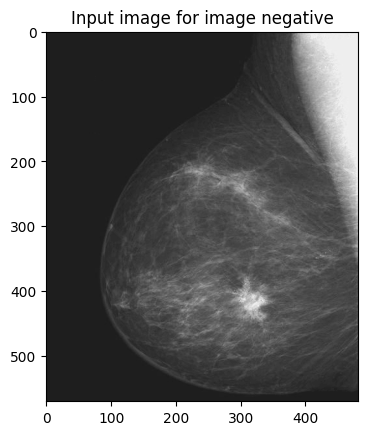

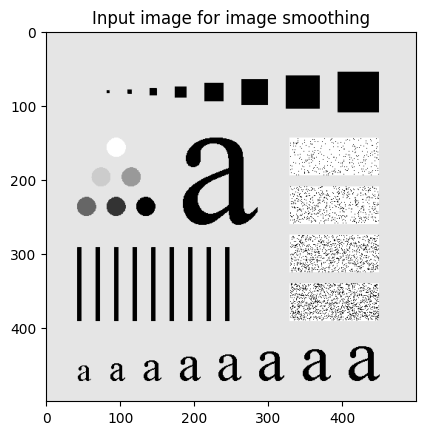

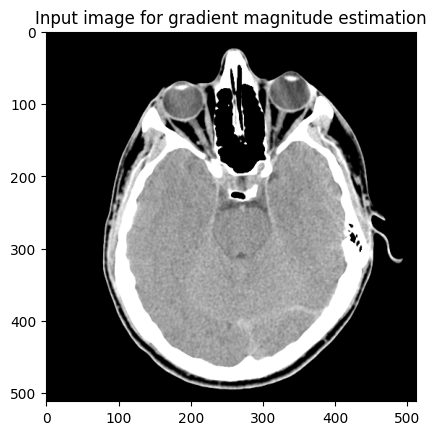

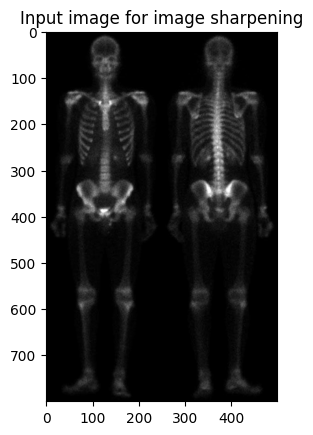

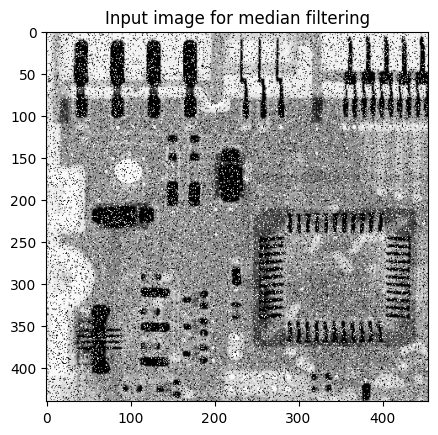

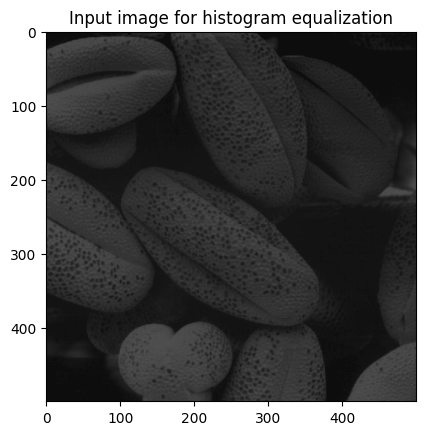

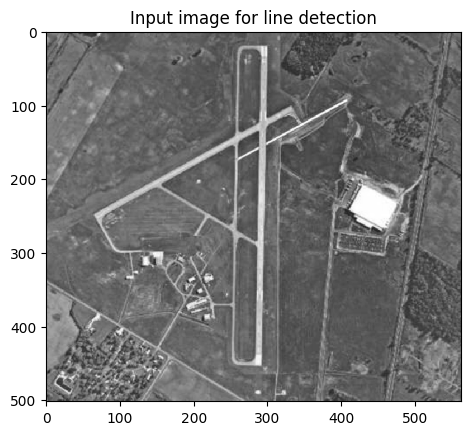

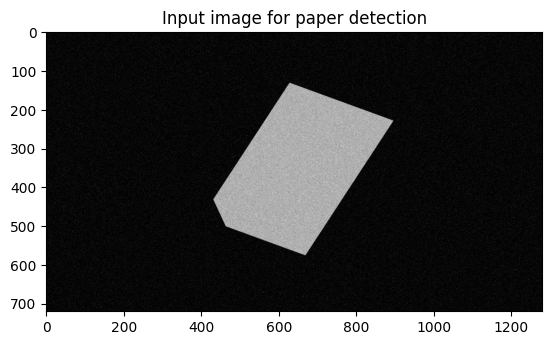

[(132, 627), (229, 895), (479, 402), (576, 670)]


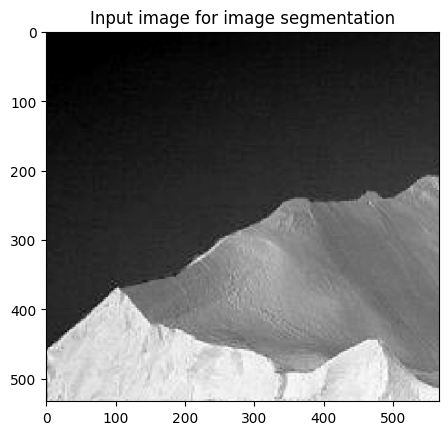

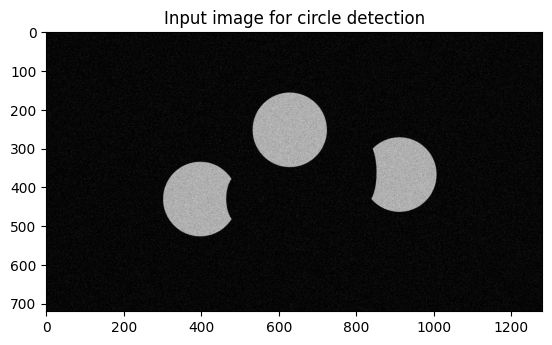

In [15]:
# Run this code block to see your output images
main()